# Problem Statement

**Context:** The Gurugram-based company ‘FlipItNews’ aims to revolutionize the way Indians perceive finance, business, and capital market investment, by giving it a boost through artificial intelligence (AI) and machine learning (ML). They’re on a mission to reinvent financial literacy for Indians, where financial awareness is driven by smart information discovery and engagement with peers. Through their smart content discovery and contextual engagement, the company is simplifying business, finance, and investment for millennials and first-time investors.

**Objectives:** The goal of this project is to use a bunch of news articles extracted from the companies’ internal database and categorize them into several categories like politics, technology, sports, business and entertainment based on their content. Use natural language processing and create & compare at least three different models.

# Attribute Information:
  * Article
  * Category

# Approoach
1. Importing libraries
2. Loading Data set
        * Reading the data file
3. Data Exploration
      * Shape of Dataset
      * News articles per category
4. Text Processing
      * Removing the non letters
      * Tokenizing the text
      * Removing stopwords
      * Lemmatization
5. Data Transformation
      * Encoding the target variable
      * TF-IDF
      * Train-Test split
6. Model Training & Evalution
      *  Simple Approach
            * MultinomialNB Naive Bayes
      *  Classical ML
            * Decision Tree
            * Random Forest
      *  NLP models
            * LSTM
            * Simple RNN
            * GRU

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import category_encoders as ce

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score 



[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
!pip install gdown


In [3]:
!gdown --id 1I3-pQFzbSufhpMrUKAROBLGULXcWiB9u

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1I3-pQFzbSufhpMrUKAROBLGULXcWiB9u
To: /kaggle/working/flipitnews-data.csv
100%|██████████████████████████████████████| 5.06M/5.06M [00:00<00:00, 18.5MB/s]


In [4]:
df = pd.read_csv("/kaggle/working/flipitnews-data.csv")
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [5]:
print("number of rows", df.shape[0])

number of rows 2225


<Axes: xlabel='Category', ylabel='count'>

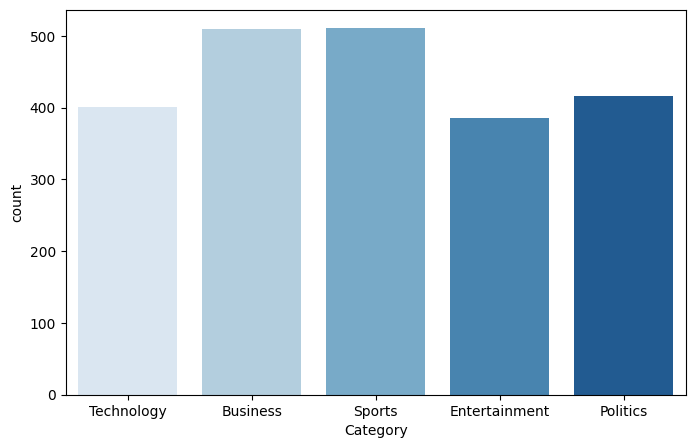

In [6]:
plt.figure(figsize = (8,5))
sns.countplot(data = df, x = "Category", palette = "Blues")

In [7]:
df["Article"][0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [9]:
#Encoding the 'Category' column
encode = ce.OrdinalEncoder(cols = ["Category"])
df = encode.fit_transform(df)

In [10]:
df.head(10)

,Category,Article
0,1,tv future in the hands of viewers with home th...
1,2,worldcom boss left books alone former worldc...
2,3,tigers wary of farrell gamble leicester say ...
3,3,yeading face newcastle in fa cup premiership s...
4,4,ocean s twelve raids box office ocean s twelve...
5,5,howard hits back at mongrel jibe michael howar...
6,5,blair prepares to name poll date tony blair is...
7,3,henman hopes ended in dubai third seed tim hen...
8,3,wilkinson fit to face edinburgh england captai...
9,4,last star wars not for children the sixth an...


In [12]:
tf_idf = TfidfVectorizer()

X = tf_idf.fit_transform(df["Article"]).toarray()
Y = np.array(df["Category"].values)

# Start with TF-IDF:

TF-IDF: Term Frequency, Inverse Documnet Frequency

In [13]:
print("Number of features", X.shape[1])

Number of features 29421


In [14]:
Y.shape

(2225,)

In [15]:
x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size = 0.25, shuffle = True, stratify =Y)

In [16]:
print("Number of rows in train data", x_train.shape[0])
print("Number of rows in validation data", x_val.shape[0])

Number of rows in train data 1668
Number of rows in validation data 557


In [17]:
x_train

array([[0.        , 0.03259222, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02480473, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [18]:
np.unique(x_train[0], return_counts = True)

(array([0.        , 0.01378761, 0.01546881, 0.01603223, 0.01696585,
        0.01924191, 0.01946139, 0.02051359, 0.0214441 , 0.02194738,
        0.02282815, 0.02377329, 0.02380018, 0.02499807, 0.02546411,
        0.02625307, 0.02755279, 0.02762495, 0.02907856, 0.0291191 ,
        0.02978579, 0.02982862, 0.03035397, 0.03071644, 0.03127994,
        0.03130397, 0.03169448, 0.03180003, 0.03237642, 0.03259222,
        0.03269218, 0.03381709, 0.03402311, 0.03432324, 0.03441465,
        0.03491341, 0.0354653 , 0.03573339, 0.03671805, 0.03794358,
        0.03806465, 0.03839318, 0.03910241, 0.03912029, 0.039432  ,
        0.03984412, 0.04157584, 0.04201765, 0.04240881, 0.04302318,
        0.04410365, 0.04416849, 0.04444251, 0.04469923, 0.04575717,
        0.04598297, 0.04600561, 0.04605454, 0.04659198, 0.04704114,
        0.04853376, 0.04909219, 0.04987636, 0.05008007, 0.05039177,
        0.05148861, 0.05183666, 0.052074  , 0.05219433, 0.05220686,
        0.05268715, 0.05333081, 0.05414803, 0.05

# Simple Approaches


# MultinomialNB Naive Bayes

In [19]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [20]:
nb_train_acc = accuracy_score (y_train, nb.predict(x_train))
nb_test_acc = accuracy_score(y_val, nb.predict(x_val))

print("Train Accuracy is", nb_train_acc)
print("Test Accuracy is", nb_test_acc)

Train Accuracy is 0.9838129496402878
Test Accuracy is 0.9587073608617595


In [21]:
y_pred_nb = nb.predict(x_val)
y_pred_prob_nb = nb.predict_proba(x_val)

roc_auc_score(y_val, y_pred_prob_nb, multi_class = 'ovr')

0.9979587140565387

In [22]:
precision = precision_score(y_val, y_pred_nb, average = 'weighted')
recall = recall_score(y_val, y_pred_nb, average = "weighted")
f1 = f1_score(y_val, y_pred_nb, average = "weighted")

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Precision: 0.9593574685633637
Recall: 0.9587073608617595
F1 score: 0.9580482553552573


**Confusion Matrix**

<Axes: >

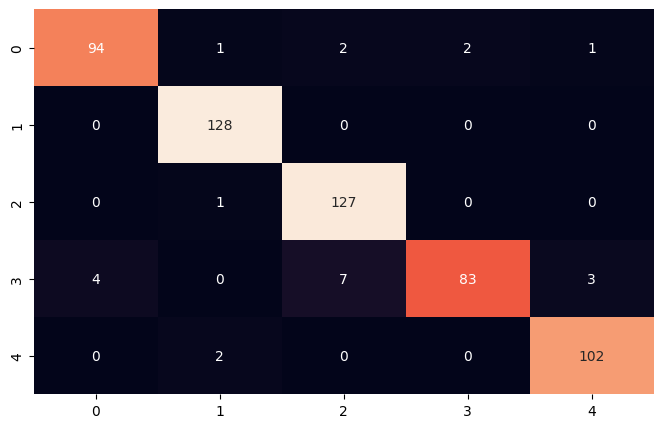

In [23]:
cm = confusion_matrix(y_val, y_pred_nb)

plt.figure(figsize = (8,5))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)

# Lets try Classical ML algorithems

In [24]:
def model_train(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    y_pred_prob = model.predict_proba(x_val)
    return y_pred, y_pred_prob


def model_eval(model, y_pred, y_pred_proba):
    print("---------------")
    train_acc = accuracy_score (y_train, model.predict(x_train))
    test_acc = accuracy_score (y_val, model.predict(x_val))

    print("Train accuracy:", train_acc)
    print("Test accuracy:", test_acc)

    print()

    print("ROC AUC Score:", roc_auc_score(y_val, y_pred_proba, multi_class = 'ovr'))

    print("Precision:", precision_score(y_val, y_pred, average = 'weighted'))
    print("Recall: ", recall_score(y_val, y_pred, average = "weighted"))
          
    print("f1:", f1_score(y_val, y_pred, average = "weighted"))

    print("--------------------------")


# Decision Tree

In [25]:
dt = DecisionTreeClassifier()

y_pred_dt, y_pred_proba_dt = model_train(dt)

model_eval(dt, y_pred_dt, y_pred_proba_dt)

---------------
Train accuracy: 1.0
Test accuracy: 0.770197486535009

ROC AUC Score: 0.8533330207952033
Precision: 0.7737085650857763
Recall:  0.770197486535009
f1: 0.7703244950048063
--------------------------


# Random Forest

In [26]:
rf = RandomForestClassifier()

y_pred_rf, y_pred_proba_rf = model_train(rf)

model_eval(dt, y_pred_rf, y_pred_proba_rf)


---------------
Train accuracy: 1.0
Test accuracy: 0.770197486535009

ROC AUC Score: 0.9959031757388305
Precision: 0.9486301426756472
Recall:  0.947935368043088
f1: 0.9475911634678142
--------------------------


# LSTM

Long Short Term Memory

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, GRU, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [28]:
df = pd.read_csv("/kaggle/working/flipitnews-data.csv")
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [29]:
# Parameters
max_features = 5000   #keeping only top most frequent words in the data set for Vocabulary
maxlen = 100          #Considring first 100 words for processing or classification
embedding_size = 100  #Size/dimension of each vector(Word to Vector representation)
batch_size = 500
epochs = 15

In [30]:
def preprocessing_text(df, text_column):
    df[text_column] = df[text_column].apply(lambda x:x.lower())
    return df

df = preprocessing_text(df,"Article")

In [31]:
tokenizer = Tokenizer(num_words = max_features) #Initializing the tokenizer object, used to convert text into sequence of integers.The num_words parameter specifies the maximum number of words keep in the tokenization process(Most freequent words in the data set)
tokenizer.fit_on_texts(df['Article'])  #Takes list of texts and processes it to create a word index(Map each word in the article column to a unique integer)

sequences = tokenizer.texts_to_sequences(df["Article"]) #This line converts each text in the article column into a sequence of integers)
data = pad_sequences(sequences, maxlen = maxlen) #This line ensures that all the sequences have the same length.If length of document <100 words, it does this by padding shorter sequences with zeros.

In [32]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'and': 4,
 'a': 5,
 'in': 6,
 's': 7,
 'for': 8,
 'is': 9,
 'that': 10,
 'it': 11,
 'on': 12,
 'said': 13,
 'was': 14,
 'he': 15,
 'be': 16,
 'with': 17,
 'as': 18,
 'has': 19,
 'have': 20,
 'at': 21,
 'by': 22,
 'will': 23,
 'but': 24,
 'are': 25,
 'i': 26,
 'from': 27,
 'not': 28,
 'they': 29,
 'his': 30,
 'we': 31,
 'mr': 32,
 'this': 33,
 'an': 34,
 'which': 35,
 'would': 36,
 'had': 37,
 'been': 38,
 'their': 39,
 'more': 40,
 'year': 41,
 'up': 42,
 'its': 43,
 'were': 44,
 'also': 45,
 'who': 46,
 'people': 47,
 'new': 48,
 'us': 49,
 'one': 50,
 'there': 51,
 'about': 52,
 'out': 53,
 'after': 54,
 'can': 55,
 'or': 56,
 'than': 57,
 'all': 58,
 'you': 59,
 'if': 60,
 'could': 61,
 'over': 62,
 'last': 63,
 'first': 64,
 't': 65,
 'when': 66,
 'time': 67,
 'two': 68,
 'world': 69,
 'government': 70,
 'other': 71,
 'now': 72,
 'so': 73,
 'what': 74,
 'some': 75,
 'into': 76,
 'uk': 77,
 'she': 78,
 'years': 79,
 'no': 80,
 'best': 81,
 'them': 82,

In [33]:
data[0] #Considering only 100 words and an unique integer is assigned to ech unique word

array([   9,    7, 1441,  176,   17,   34, 1563, 1102,    4,  685, 4204,
         50,    3,    1,   49,    7,  335, 2198,  176,  223,   19,  190,
        744,   43,  207, 3126,   21,    1,  149,   17,  599,  808,    3,
       2555, 3924, 3591,    4,    5,  500, 4862,    1,  112,   55, 4665,
          4,  176,    8,   42,    2, 1864,  808,    4,  387,  208,  378,
       2888,  439,    6,   30,  753,  149, 4069,  859,    5, 3814,   17,
        251,   35,  507,   47,   55,  159, 1865, 1147,   12,  921,  971,
          4,  168,  707,   58,  182, 3209,    1, 1473, 1668,    3,   42,
       1758,   73,   10,   47,   55, 1044,   74,   29,  164,   66,   29,
        164], dtype=int32)

In [34]:
le = LabelEncoder()

labels = le.fit_transform(df["Category"])
labels = tf.keras.utils.to_categorical(labels)

In [35]:
labels

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [36]:
#Train-Test split
x_train, x_test, y_train, y_test = train_test_split(data,labels, test_size = 0.25, random_state = 42)

In [37]:
# Lets download glove enbedding file

# Step 1: Download the ZIP file
!wget https://huggingface.co/stanfordnlp/glove/resolve/main/glove.6B.zip

--2025-01-15 13:45:24--  https://huggingface.co/stanfordnlp/glove/resolve/main/glove.6B.zip
Resolving huggingface.co (huggingface.co)... 3.163.189.74, 3.163.189.37, 3.163.189.114, ...
Connecting to huggingface.co (huggingface.co)|3.163.189.74|:443... connected.
HTTP request sent, awaiting response... 

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


302 Found
Location: https://cdn-lfs.hf.co/stanfordnlp/glove/6471382cdd837544bf3ac72497a38715e845897d265b2b424b4761832009c837?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27glove.6B.zip%3B+filename%3D%22glove.6B.zip%22%3B&response-content-type=application%2Fzip&Expires=1737207924&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczNzIwNzkyNH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9zdGFuZm9yZG5scC9nbG92ZS82NDcxMzgyY2RkODM3NTQ0YmYzYWM3MjQ5N2EzODcxNWU4NDU4OTdkMjY1YjJiNDI0YjQ3NjE4MzIwMDljODM3P3Jlc3BvbnNlLWNvbnRlbnQtZGlzcG9zaXRpb249KiZyZXNwb25zZS1jb250ZW50LXR5cGU9KiJ9XX0_&Signature=nwMshAKjBl1CkeS20eiO%7EeYwHEonYAXTPQWT0eUFOx%7EEYiBDEj2dT2SgO0x0NDXfWwG8mfaWbmrHO-8AMkpykzo2j2BClolL4wg6faL4ny6clv96ScY%7EW9IrOLv4URoedYM3lNn9IuoxSCc7VRpzB5Qb%7ElJYDHTH3iFnrv6VwKXnVnnaADe8XYJcAWxq-nCXSQrTDph7Tl60274e-z-SK9IQas37I5kbmkQLkmEX-TblpD911RNT1EJutsGTqrI1JGhSp9epZHY3lnHXIztWK2X-Xd-%7EPeJtcdq2H6wZYlr85SZotPFTmk5A9nGceKzVSqdSzB114C5w6COxc1fWOQ__&

In [38]:
# Step 2: Unzip the file
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       
  inflating: glove.6B.50d.txt        


In [39]:
# Open the file in read mode (Looking into embedding file to get more understanding)
with open('glove.6B.100d.txt', 'r') as file:
    # Read the entire file content
    content = file.read()

# Print the content
print(content[0:100])


the -0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 


In [40]:
content[0:500]

'the -0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 -0.06731 0.30906 -0.26384 -0.13231 -0.20757 0.33395 -0.33848 -0.31743 -0.48336 0.1464 -0.37304 0.34577 0.052041 0.44946 -0.46971 0.02628 -0.54155 -0.15518 -0.14107 -0.039722 0.28277 0.14393 0.23464 -0.31021 0.086173 0.20397 0.52624 0.17164 -0.082378 -0.71787 -0.41531 0.20335 -0.12763 0.41367 0.55187 0.57908 -0.33477 -0.36559 -0.54857 -0.062892 0.26584 0.30205 0.99775 -0.80481 -3.0243 0.01254 -0.36'

In [41]:
# Load the glove embedding file and create embedding matrix
def load_glove_embeddings(embedding_path, embedding_dim, tokenizer, max_features):
 
  embeddings_index = {}
 
  with open(embedding_path, 'r', encoding='utf8') as f:
    for line in f:
      values = line.split()
      word = values[0]
      coefs = np.asarray(values[1:], dtype='float32')
      embeddings_index[word] = coefs
 
 
  limited_word_index = {word:index for word, index in tokenizer.word_index.items() if index < max_features}
  embedding_matrix =  np.zeros((min(max_features + 1, len(limited_word_index) + 1), embedding_dim))
 
  for word, i in limited_word_index.items():
    if i > max_features:
      continue
 
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector
 
  return embedding_matrix

In [42]:
embedding_matrix = load_glove_embeddings('glove.6B.100d.txt', embedding_size, tokenizer, max_features)

In [43]:
embedding_matrix.shape

(5000, 100)

**Model Building**

In [44]:
model = Sequential([
    Embedding(max_features, embedding_size, weights = [embedding_matrix],
             trainable = False),
    LSTM(100),
    Dense(len(np.unique(df["Category"])), activation ='softmax')
])

In [45]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

**Model Training**

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor ='val_loss', patience = 5)

history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_test, y_test), 
         verbose = 2, callbacks =[early_stopping])

Epoch 1/15
4/4 - 4s - 947ms/step - accuracy: 0.2338 - loss: 1.6259 - val_accuracy: 0.3519 - val_loss: 1.5460
Epoch 2/15
4/4 - 0s - 25ms/step - accuracy: 0.4035 - loss: 1.5112 - val_accuracy: 0.4668 - val_loss: 1.4484
Epoch 3/15
4/4 - 0s - 25ms/step - accuracy: 0.5324 - loss: 1.3951 - val_accuracy: 0.5440 - val_loss: 1.3232
Epoch 4/15
4/4 - 0s - 26ms/step - accuracy: 0.5959 - loss: 1.2306 - val_accuracy: 0.5943 - val_loss: 1.0997
Epoch 5/15
4/4 - 0s - 24ms/step - accuracy: 0.6139 - loss: 1.0130 - val_accuracy: 0.5583 - val_loss: 1.0698
Epoch 6/15
4/4 - 0s - 24ms/step - accuracy: 0.6775 - loss: 0.9396 - val_accuracy: 0.6876 - val_loss: 0.9415
Epoch 7/15
4/4 - 0s - 24ms/step - accuracy: 0.7602 - loss: 0.8260 - val_accuracy: 0.7181 - val_loss: 0.8064
Epoch 8/15
4/4 - 0s - 23ms/step - accuracy: 0.7836 - loss: 0.6964 - val_accuracy: 0.7612 - val_loss: 0.7057
Epoch 9/15
4/4 - 0s - 23ms/step - accuracy: 0.8219 - loss: 0.5783 - val_accuracy: 0.8115 - val_loss: 0.5711
Epoch 10/15
4/4 - 0s - 24ms

**Validation loss Vs no of Epochs**

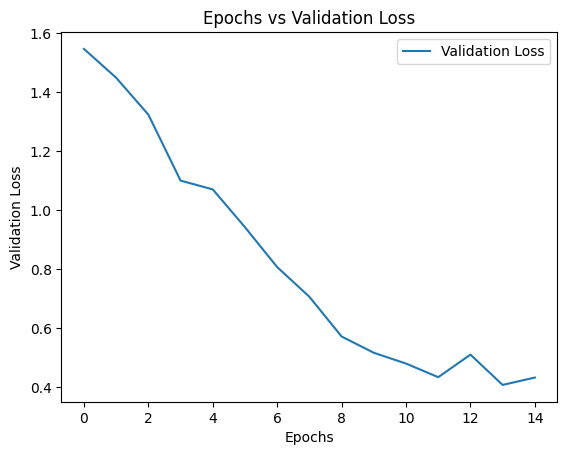

In [47]:
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs') 
plt.ylabel('Validation Loss') 
plt.title('Epochs vs Validation Loss')
plt.legend()
plt.show()

**Model Evalution**

In [48]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)
y_test_argmax = np.argmax(y_test, axis = 1)

print(classification_report(y_test_argmax, y_pred))

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       136
           1       0.87      0.82      0.84        96
           2       0.79      0.87      0.83        98
           3       0.98      0.90      0.94       124
           4       0.79      0.91      0.85       103

    accuracy                           0.87       557
   macro avg       0.87      0.87      0.86       557
weighted avg       0.87      0.87      0.87       557



# Simple RNN

In [49]:
# Model building
model_RNN = Sequential([
    Embedding(max_features, embedding_size, weights = [embedding_matrix],
             trainable = False),
    SimpleRNN(100),
    Dense(len(np.unique(df["Category"])), activation ='softmax')
])

# Compiling
model_RNN.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor ='val_loss', patience = 5)

#Model training
model_RNN.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_test, y_test), 
         verbose = 1, callbacks =[early_stopping])


Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 528ms/step - accuracy: 0.1814 - loss: 1.8289 - val_accuracy: 0.2406 - val_loss: 1.7091
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3024 - loss: 1.6184 - val_accuracy: 0.3088 - val_loss: 1.5751
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3581 - loss: 1.4782 - val_accuracy: 0.3303 - val_loss: 1.4868
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4222 - loss: 1.3734 - val_accuracy: 0.3698 - val_loss: 1.4067
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4873 - loss: 1.2679 - val_accuracy: 0.4542 - val_loss: 1.2719
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5684 - loss: 1.1183 - val_accuracy: 0.5386 - val_loss: 1.1188
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5595 - loss: 1.0148 - val_accuracy: 0.5548 - val_loss: 1.0722
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6081 - loss: 0.9789 - val_accuracy: 0.5655 - val_loss: 1.0557

**Model Evalution**

In [50]:
y_pred = model_RNN.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)
y_test_argmax = np.argmax(y_test, axis = 1)

print(classification_report(y_test_argmax, y_pred))


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
              precision    recall  f1-score   support

           0       0.56      0.86      0.68       136
           1       0.96      0.46      0.62        96
           2       0.48      0.57      0.52        98
           3       0.98      0.80      0.88       124
           4       0.69      0.56      0.62       103

    accuracy                           0.67       557
   macro avg       0.73      0.65      0.66       557
weighted avg       0.73      0.67      0.67       557



# GRU

In [51]:
# Model building
model_GRU = Sequential([
    Embedding(max_features, embedding_size, weights = [embedding_matrix],
             trainable = False),
    GRU(100),
    Dense(len(np.unique(df["Category"])), activation ='softmax')
])

# Compiling
model_GRU.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor ='val_loss', patience = 5)

#Model training
model_GRU.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_test, y_test), 
         verbose = 1, callbacks =[early_stopping])

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.2331 - loss: 1.6312 - val_accuracy: 0.3465 - val_loss: 1.5366
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3653 - loss: 1.5131 - val_accuracy: 0.4470 - val_loss: 1.4551
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4840 - loss: 1.4151 - val_accuracy: 0.4614 - val_loss: 1.3783
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5232 - loss: 1.3376 - val_accuracy: 0.5063 - val_loss: 1.3067
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5724 - loss: 1.2590 - val_accuracy: 0.5494 - val_loss: 1.2304
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6080 - loss: 1.1651 - val_accuracy: 0.5781 - val_loss: 1.1415
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6241 - loss: 1.0836 - val_accuracy: 0.6158 - val_loss: 1.0182
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6723 - loss: 0.9454 - val_accuracy: 0.6643 - val_loss: 0.8625


**Model Evalution**

In [52]:
y_pred = model_GRU.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)
y_test_argmax = np.argmax(y_test, axis = 1)

print(classification_report(y_test_argmax, y_pred))

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       136
           1       0.84      0.90      0.87        96
           2       0.78      0.80      0.79        98
           3       0.98      0.94      0.96       124
           4       0.87      0.88      0.88       103

    accuracy                           0.87       557
   macro avg       0.87      0.87      0.87       557
weighted avg       0.87      0.87      0.87       557



# Models Comparision

| Models |     Accuracy          |
--------------------------------
|Naive Baye's      |     95.8%  |

|Decision Tree     |     77.0%  |

|Random Forest     |     77.0%  |

|LSTM              |     87.0%  |

|Simple RNN        |     67.0%  |

|GRU               |     87.0%  |